In [1]:
% load_ext autoreload
% autoreload 2
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from awd.mdata.biology import get_dataloader
from ex_biology import p

# load results

In [2]:
train_loader, test_loader = get_dataloader(p.data_path,
                                           batch_size=p.batch_size,
                                           is_continuous=True)

In [3]:
X, y = iter(train_loader).next()
x = X.detach().numpy().squeeze()

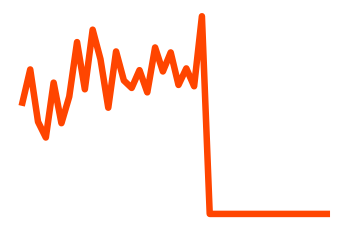

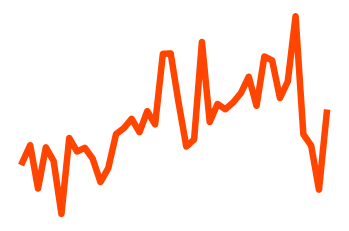

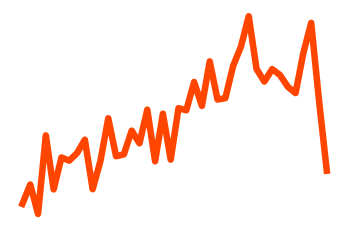

In [4]:
nums = [1, 5, 6]
for num in nums:
    plt.plot(x[num], lw=6.5, color='orangered')
    plt.axis('off')
    plt.savefig(f'ex_{num}.pdf', bbox_inches='tight')
    plt.show()

# pick canonical events

In [5]:
X, y = iter(test_loader).next()
y = y.flatten().numpy()
args = np.argsort(y)[::-1]
X = X.numpy().squeeze()
X = X[args]
Xpos = X[X[:, -1] < 0][50:]
Xneg = X[X[:, -1] < 0][-20:]

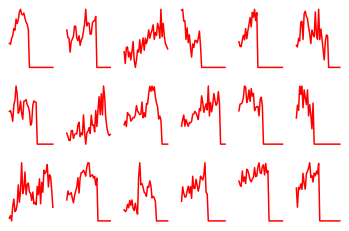

In [6]:
R, C = 3, 6
for i in range(R * C):
    plt.subplot(R, C, i + 1)
    plt.plot(Xpos[i], color='red')
    plt.axis('off')
plt.savefig('events_pos.pdf', bbox_inches='tight')
plt.show()

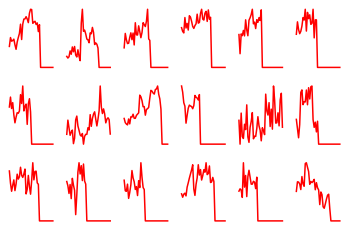

In [7]:
R, C = 3, 6
for i in range(R * C):
    plt.subplot(R, C, i + 1)
    plt.plot(Xneg[i], color='red')
    plt.axis('off')
plt.savefig('events_neg.pdf', bbox_inches='tight')
plt.show()